# Métodos Analíticos para Textos

# Proyecto Final

## Amanda Balderas Mendoza

### Mayo 2015

In [1]:
import numpy as np
import pandas as pd
import re
import codecs
import string
import math
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import spectral_clustering
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, dendrogram
from scipy.cluster.hierarchy import fcluster

In [3]:
#Leemos el archivo y guardamos cada ejemplo en una lista
f = codecs.open('Proyecto_F_corpus.txt', 'r')
lista1 = []
for line in f:
    lista1.append(line)
f.close()

In [4]:
lista1[0], len(lista1)

('DESC:manner How did serfdom develop in and then leave Russia ?\n', 5452)

In [5]:
# De acuerdo la estructura de cada ejemplo se realiza la limpieza correspondiente
lista2 = []
lista3 = []
lista_cate1 = []
lista_cate2 = []
lista_prim =[]
for i in range(len(lista1)):
    lista2.append(lista1[i].replace(' ?\n', ''))
    lista2[i] = lista2[i].replace(' .\n', '')
    lista2[i] = re.sub('[0123456789]', '', lista2[i])
    lista2[i] = lista2[i].split(":")
    lista_cate1.append(lista2[i][0])
    lista2[i][1] = (re.sub('[%s]' % re.escape(string.punctuation), '', lista2[i][1])).lower()
    lista2[i][1] = lista2[i][1].split()
    lista_cate2.append(lista2[i][1][0])
    lista_prim.append(lista2[i][1][1])
    lista3.append(list(lista2[i][1][1:(len(lista2[i][1]))]))

In [6]:
# Guardamos la lista de palabras y de oraciones
stemm1 =PorterStemmer()
stemm2 = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))
palabras_t = []
#lista5 = []
lista_ora = []
lista_ora2 = []
for i in range(len(lista3)):
    #lista5.append([k for k in lista3[i] if k not in stop_words])
    palabras = lista3[i]
    lista4 = []
    oracion = ''
    for j in range(len(palabras)):
        palabra = palabras[j]
        if palabra != '' and palabra != ' ':
            try:
                palabra = stemm1.stem(palabra)
                lista4.append(palabra)
                palabras_t.append(palabra)
                if oracion == '':
                    oracion = str(palabra)
                else:
                    oracion = oracion + ' ' + str(palabra)
            except:
                palabra = palabra    
    if lista4 != []:
        lista_ora.append(lista4)
        lista_ora2.append(oracion)

In [7]:
lista_cate1[1], lista_cate2[1],lista_ora[1], lista_ora2[1], len(lista_ora), len(palabras_t)

('ENTY',
 'cremat',
 [u'what', u'film', u'featur', u'the', u'charact', u'popey', u'doyl'],
 'what film featur the charact popey doyl',
 5452,
 47600)

In [8]:
# Obtenemos la lista del vocabulario
palabras = list(np.unique(palabras_t))
no_palabras = len(palabras)
no_palabras

6787

In [9]:
# Verificamos es número de grupos "principal"
grupos = list(np.unique(lista_cate1))
no_grupos = len(grupos)
no_grupos

6

In [10]:
# Verificamos es número de grupos "secundario"
grupos2 = list(np.unique(lista_cate2))
no_grupos2 = len(grupos2)
no_grupos2

47

In [11]:
# Obtenemos la lista de palabras iniciales de cada oración
iniciales = list(np.unique(lista_prim))
len(iniciales)

55

In [12]:
# Conteo de categorias
lista_uno = []
for i in range(len(lista_cate1)):
    lista_uno.append(1)
agrupa = pd.DataFrame()
agrupa['grupos1'] = lista_cate1
agrupa['grupos2'] = lista_cate2
agrupa['conteo'] = lista_uno
agrupa = agrupa.sort('grupos1')
agrupa.groupby(['grupos1', 'grupos2']).sum()

conteo
grupos1 grupos2          
ABBR    abb            16
        exp            70
DESC    def           421
        desc          274
        manner        276
        reason        191
ENTY    animal        112
        body           16
        color          40
        cremat        207
        currency        4
        dismed        103
        event          56
        food          103
        instru         10
        lang           16
        letter          9
        other         217
        plant          13
        product        42
        religion        4
        sport          62
        substance      41
        symbol         11
        techmeth       38
        termeq         93
        veh            27
        word           26
HUM     desc           47
        gr            189
        ind           962
        title          25
LOC     city          129
        country       155
        mount          21
        other         464
        state          66
NUM     code            9
        count         363
        date          218
        dist           34
        money          71
        ord             6
        other          52
        perc           27
        period         75
        speed           9
        temp            8
        volsize        13
        weight         11

In [13]:
# Conteo de palabras
lista_uno = []
for i in range(len(palabras_t)):
    lista_uno.append(1)
agru = pd.DataFrame()
agru['palabra'] = palabras_t
agru['conteo'] = lista_uno
agru1 = agru.groupby(['palabra']).sum()
agru1 = agru1.sort('conteo', ascending=False)
agru1.head()

,conteo
palabra,
the,3744
what,3376
is,1670
of,1541
in,1198


In [14]:
# Conteo de categorias
lista_uno = []
for i in range(len(lista_prim)):
    lista_uno.append(1)
agru = pd.DataFrame()
agru['palabra'] = lista_prim
agru['conteo'] = lista_uno
agru1 = agru.groupby(['palabra']).sum()
agru1 = agru1.sort('conteo', ascending=False)
agru1.head()

,conteo
palabra,
what,3242
how,764
who,559
where,273
when,131


In [15]:
# Obtenemos el largo de las oraciones
cuenta_pala = []
for i in range(len(lista_ora)):
    cuenta_pala.append(len(lista_ora[i]))
max(cuenta_pala), min(cuenta_pala), np.mean(cuenta_pala)

(33, 2, 8.7307410124724871)

In [16]:
# Obtenemos lista de stop-words eliminando los casos que correspondan a las palabras iniciales de las oraciones
stop_words1 = set(stopwords.words('english'))
for i in range(len(iniciales)):
    if iniciales[i] in stop_words1:
        stop_words1.remove(iniciales[i])
len(stop_words), len(stop_words1), len(stop_words) - len(stop_words1)

(153, 133, 20)

In [17]:
# Obtenemos los vectores de documentos con tfidf sin considerar stop-words "original"
vectorizando1 = TfidfVectorizer(stop_words=stop_words)
tdidf_1 = vectorizando1.fit_transform(k for k in lista_ora2)
tdidf_1

<5452x6658 sparse matrix of type '<type 'numpy.float64'>'
	with 25688 stored elements in Compressed Sparse Row format>

In [18]:
# Obtenemos los vectores de documentos con tfidf sin considerar stop-words "sin plabras iniciales"
vectorizando2 = TfidfVectorizer(stop_words=stop_words1)
tdidf_2 = vectorizando2.fit_transform(k for k in lista_ora2)
tdidf_2

<5452x6676 sparse matrix of type '<type 'numpy.float64'>'
	with 38316 stored elements in Compressed Sparse Row format>

In [19]:
# Obtenemos los vectores de documentos con tfidf sin considerar los terminos que tienen una frecuencia más alta que 0.8 
# y menor que 0.00019
vectorizando3 = TfidfVectorizer(max_df=0.8, min_df=0.00019)
tdidf_3 = vectorizando3.fit_transform(k for k in lista_ora2)
tdidf_3

<5452x2975 sparse matrix of type '<type 'numpy.float64'>'
	with 40234 stored elements in Compressed Sparse Row format>

In [12]:
# Obtenemos los vectores de documentos con tfidf sin considerar los terminos que tienen una frecuencia más alta que 0.8 
# y menor que 0.00018
vectorizando4 = TfidfVectorizer(max_df=0.8, min_df=0.00018)
tdidf_4 = vectorizando4.fit_transform(k for k in lista_ora2)
tdidf_4

<5452x6762 sparse matrix of type '<type 'numpy.float64'>'
	with 44021 stored elements in Compressed Sparse Row format>

In [21]:
# Obtenemos los vectores de documentos con tfidf  considerando bi-gramas
vectorizando5 = TfidfVectorizer(ngram_range=(2,2))
tdidf_5 = vectorizando5.fit_transform(k for k in lista_ora2)
tdidf_5

<5452x22701 sparse matrix of type '<type 'numpy.float64'>'
	with 40024 stored elements in Compressed Sparse Row format>

In [22]:
# Obtenemos los vectores de documentos con tfidf  considerando todas las plabras del corpus
vectorizando6 = TfidfVectorizer(vocabulary = palabras)
tdidf_6 = vectorizando6.fit_transform(k for k in lista_ora2)
tdidf_6

<5452x6787 sparse matrix of type '<type 'numpy.float64'>'
	with 44021 stored elements in Compressed Sparse Row format>

In [23]:
# Obtenemos las matrices de adyacencia con la métrica de similitud coseno
matriz_1 = cosine_similarity(tdidf_1)
matriz_2 = cosine_similarity(tdidf_2)
matriz_3 = cosine_similarity(tdidf_3)
matriz_4 = cosine_similarity(tdidf_4)
matriz_5 = cosine_similarity(tdidf_5)
matriz_6 = cosine_similarity(tdidf_6)

In [13]:
matriz_4 = cosine_similarity(tdidf_4)
spectral_4 = spectral_clustering(matriz_4, n_clusters=6)

In [25]:
# Obtenemos los cluster con KMeans y Spectral Clustering del caso 1
kmeans_1 = KMeans(n_clusters=6).fit_predict(tdidf_1)
spectral_1 = spectral_clustering(matriz_1, n_clusters=6)

In [26]:
# Obtenemos los cluster con KMeans y Spectral Clustering del caso 2
kmeans_2 = KMeans(n_clusters=6).fit_predict(tdidf_2)
spectral_2 = spectral_clustering(matriz_2, n_clusters=6)

In [27]:
# Obtenemos los cluster con KMeans y Spectral Clustering del caso 3
kmeans_3 = KMeans(n_clusters=6).fit_predict(tdidf_3)
spectral_3 = spectral_clustering(matriz_3, n_clusters=6)

In [28]:
# Obtenemos los cluster con KMeans y Spectral Clustering del caso 4
kmeans_4 = KMeans(n_clusters=6).fit_predict(tdidf_4)
spectral_4 = spectral_clustering(matriz_4, n_clusters=6)

In [29]:
# Obtenemos los cluster con KMeans y Spectral Clustering del caso 5
kmeans_5 = KMeans(n_clusters=6).fit_predict(tdidf_5)
spectral_5 = spectral_clustering(matriz_5, n_clusters=6)

In [30]:
# Obtenemos los cluster con KMeans y Spectral Clustering del caso 6
kmeans_6 = KMeans(n_clusters=6).fit_predict(tdidf_6)
spectral_6 = spectral_clustering(matriz_6, n_clusters=6)

In [31]:
# Organizamos todos los resultados en un DataFrame
resultados = pd.DataFrame()
resultados['grupos'] = lista_cate1
resultados['KMeans_1'] = kmeans_1
resultados['KMeans_2'] = kmeans_2
resultados['KMeans_3'] = kmeans_3
resultados['KMeans_4'] = kmeans_4
resultados['KMeans_5'] = kmeans_5
resultados['KMeans_6'] = kmeans_6
resultados['Spectral_1'] = spectral_1
resultados['Spectral_2'] = spectral_2
resultados['Spectral_3'] = spectral_3
resultados['Spectral_4'] = spectral_4
resultados['Spectral_5'] = spectral_5
resultados['Spectral_6'] = spectral_6
resultados = resultados.sort('grupos')

In [32]:
# Verificamos los resultados de la agrupación con KMeans del caso 1
agrupa1 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_1'], margins=True)
agrupa1

KMeans_1,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,35,0,49,2,0,0,86
DESC,950,17,117,39,39,0,1162
ENTY,849,40,61,128,105,67,1250
HUM,766,37,18,165,235,2,1223
LOC,653,44,35,40,63,0,835
NUM,406,50,324,3,113,0,896
All,3659,188,604,377,555,69,5452


In [33]:
agrupa11 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_1']).apply(lambda r: r/r.sum(), axis=1)
agrupa11

KMeans_1,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.406977,0.000000,0.569767,0.023256,0.000000,0.000000
DESC,0.817556,0.014630,0.100688,0.033563,0.033563,0.000000
ENTY,0.679200,0.032000,0.048800,0.102400,0.084000,0.053600
HUM,0.626329,0.030253,0.014718,0.134914,0.192150,0.001635
LOC,0.782036,0.052695,0.041916,0.047904,0.075449,0.000000
NUM,0.453125,0.055804,0.361607,0.003348,0.126116,0.000000


In [34]:
# Verificamos los resultados de la agrupación con KMeans del caso 2
agrupa2 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_2'], margins=True)
agrupa2

KMeans_2,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,0,74,1,0,11,0,86
DESC,0,609,114,245,179,15,1162
ENTY,9,713,144,8,372,4,1250
HUM,532,414,94,1,180,2,1223
LOC,1,356,54,0,171,253,835
NUM,0,246,60,452,133,5,896
All,542,2412,467,706,1046,279,5452


In [35]:
agrupa21 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_2']).apply(lambda r: r/r.sum(), axis=1)
agrupa21

KMeans_2,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.000000,0.860465,0.011628,0.000000,0.127907,0.000000
DESC,0.000000,0.524096,0.098107,0.210843,0.154045,0.012909
ENTY,0.007200,0.570400,0.115200,0.006400,0.297600,0.003200
HUM,0.434996,0.338512,0.076860,0.000818,0.147179,0.001635
LOC,0.001198,0.426347,0.064671,0.000000,0.204790,0.302994
NUM,0.000000,0.274554,0.066964,0.504464,0.148438,0.005580


In [36]:
# Verificamos los resultados de la agrupación con KMeans del caso 3
agrupa3 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_3'], margins=True)
agrupa3

KMeans_3,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,0,0,13,11,62,0,86
DESC,65,2,192,98,550,255,1162
ENTY,85,9,337,0,812,7,1250
HUM,38,565,160,0,460,0,1223
LOC,272,1,170,0,392,0,835
NUM,95,3,112,0,210,476,896
All,555,580,984,109,2486,738,5452


In [37]:
agrupa31 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_3']).apply(lambda r: r/r.sum(), axis=1)
agrupa31

KMeans_3,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.000000,0.000000,0.151163,0.127907,0.720930,0.000000
DESC,0.055938,0.001721,0.165232,0.084337,0.473322,0.219449
ENTY,0.068000,0.007200,0.269600,0.000000,0.649600,0.005600
HUM,0.031071,0.461979,0.130826,0.000000,0.376124,0.000000
LOC,0.325749,0.001198,0.203593,0.000000,0.469461,0.000000
NUM,0.106027,0.003348,0.125000,0.000000,0.234375,0.531250


In [38]:
# Verificamos los resultados de la agrupación con KMeans del caso 4
agrupa4 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_4'], margins=True)
agrupa4

KMeans_4,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,51,0,0,24,2,9,86
DESC,321,127,1,350,214,149,1162
ENTY,644,0,10,289,60,247,1250
HUM,404,0,552,76,16,175,1223
LOC,399,0,1,229,26,180,835
NUM,236,462,1,101,19,77,896
All,2055,589,565,1069,337,837,5452


In [39]:
agrupa41 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_4']).apply(lambda r: r/r.sum(), axis=1)
agrupa41

KMeans_4,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.593023,0.000000,0.000000,0.279070,0.023256,0.104651
DESC,0.276248,0.109294,0.000861,0.301205,0.184165,0.128227
ENTY,0.515200,0.000000,0.008000,0.231200,0.048000,0.197600
HUM,0.330335,0.000000,0.451349,0.062142,0.013083,0.143091
LOC,0.477844,0.000000,0.001198,0.274251,0.031138,0.215569
NUM,0.263393,0.515625,0.001116,0.112723,0.021205,0.085938


In [40]:
# Verificamos los resultados de la agrupación con KMeans del caso 5
agrupa5 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_5'], margins=True)
agrupa5

KMeans_5,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,48,6,0,16,16,0,86
DESC,147,563,26,191,234,1,1162
ENTY,116,817,63,152,102,0,1250
HUM,26,926,156,93,21,1,1223
LOC,46,620,23,132,13,1,835
NUM,20,357,66,122,9,322,896
All,403,3289,334,706,395,325,5452


In [41]:
agrupa51 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_5']).apply(lambda r: r/r.sum(), axis=1)
agrupa51

KMeans_5,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.558140,0.069767,0.000000,0.186047,0.186047,0.000000
DESC,0.126506,0.484509,0.022375,0.164372,0.201377,0.000861
ENTY,0.092800,0.653600,0.050400,0.121600,0.081600,0.000000
HUM,0.021259,0.757155,0.127555,0.076043,0.017171,0.000818
LOC,0.055090,0.742515,0.027545,0.158084,0.015569,0.001198
NUM,0.022321,0.398438,0.073661,0.136161,0.010045,0.359375


In [42]:
# Verificamos los resultados de la agrupación con KMeans del caso 6
agrupa6 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_6'], margins=True)
agrupa6

KMeans_6,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,48,0,0,33,5,0,86
DESC,126,208,39,441,282,66,1162
ENTY,61,7,137,359,593,93,1250
HUM,20,0,605,171,374,53,1223
LOC,34,0,68,298,381,54,835
NUM,56,403,108,139,88,102,896
All,345,618,957,1441,1723,368,5452


In [43]:
agrupa61 = pd.crosstab(index=resultados['grupos'], columns=resultados['KMeans_6']).apply(lambda r: r/r.sum(), axis=1)
agrupa61

KMeans_6,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.558140,0.000000,0.000000,0.383721,0.058140,0.000000
DESC,0.108434,0.179002,0.033563,0.379518,0.242685,0.056799
ENTY,0.048800,0.005600,0.109600,0.287200,0.474400,0.074400
HUM,0.016353,0.000000,0.494685,0.139820,0.305805,0.043336
LOC,0.040719,0.000000,0.081437,0.356886,0.456287,0.064671
NUM,0.062500,0.449777,0.120536,0.155134,0.098214,0.113839


In [44]:
# Verificamos los resultados de la agrupación con Spectral Clustering del caso 1
agrupa1_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_1'], margins=True)
agrupa1_1

Spectral_1,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,35,33,0,18,0,0,86
DESC,96,826,0,238,0,2,1162
ENTY,110,705,66,369,0,0,1250
HUM,203,621,2,397,0,0,1223
LOC,151,360,0,324,0,0,835
NUM,216,305,0,373,2,0,896
All,811,2850,68,1719,2,2,5452


In [45]:
agrupa11_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_1']).apply(lambda r: r/r.sum(), axis=1)
agrupa11_1

Spectral_1,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.406977,0.383721,0.000000,0.209302,0.000000,0.000000
DESC,0.082616,0.710843,0.000000,0.204819,0.000000,0.001721
ENTY,0.088000,0.564000,0.052800,0.295200,0.000000,0.000000
HUM,0.165985,0.507768,0.001635,0.324612,0.000000,0.000000
LOC,0.180838,0.431138,0.000000,0.388024,0.000000,0.000000
NUM,0.241071,0.340402,0.000000,0.416295,0.002232,0.000000


In [46]:
# Verificamos los resultados de la agrupación con Spectral Clustering del caso 2
agrupa2_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_2'], margins=True)
agrupa2_1

Spectral_2,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,37,48,0,0,1,0,86
DESC,659,122,247,3,116,15,1162
ENTY,1112,66,7,10,52,3,1250
HUM,581,13,1,571,55,2,1223
LOC,542,15,0,1,22,255,835
NUM,250,28,459,1,152,6,896
All,3181,292,714,586,398,281,5452


In [48]:
agrupa21_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_2']).apply(lambda r: r/r.sum(), axis=1)
agrupa21_1

Spectral_2,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.430233,0.558140,0.000000,0.000000,0.011628,0.000000
DESC,0.567126,0.104991,0.212565,0.002582,0.099828,0.012909
ENTY,0.889600,0.052800,0.005600,0.008000,0.041600,0.002400
HUM,0.475061,0.010630,0.000818,0.466885,0.044971,0.001635
LOC,0.649102,0.017964,0.000000,0.001198,0.026347,0.305389
NUM,0.279018,0.031250,0.512277,0.001116,0.169643,0.006696


In [49]:
# Verificamos los resultados de la agrupación con Spectral Clustering del caso 3
agrupa3_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_3'], margins=True)
agrupa3_1

Spectral_3,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,0,1,22,48,4,11,86
DESC,2,300,350,110,306,94,1162
ENTY,9,51,357,53,780,0,1250
HUM,570,4,102,14,533,0,1223
LOC,1,14,282,15,523,0,835
NUM,6,448,130,29,282,1,896
All,588,818,1243,269,2428,106,5452


In [50]:
agrupa31_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_3']).apply(lambda r: r/r.sum(), axis=1)
agrupa31_1

Spectral_3,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.000000,0.011628,0.255814,0.558140,0.046512,0.127907
DESC,0.001721,0.258176,0.301205,0.094664,0.263339,0.080895
ENTY,0.007200,0.040800,0.285600,0.042400,0.624000,0.000000
HUM,0.466067,0.003271,0.083401,0.011447,0.435814,0.000000
LOC,0.001198,0.016766,0.337725,0.017964,0.626347,0.000000
NUM,0.006696,0.500000,0.145089,0.032366,0.314732,0.001116


In [51]:
# Verificamos los resultados de la agrupación con Spectral Clustering del caso 4
agrupa4_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_4'], margins=True)
agrupa4_1

Spectral_4,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,0,0,33,1,3,49,86
DESC,3,32,443,269,293,122,1162
ENTY,10,8,373,40,760,59,1250
HUM,571,9,103,3,519,18,1223
LOC,1,250,226,7,334,17,835
NUM,5,50,132,429,234,46,896
All,590,349,1310,749,2143,311,5452


In [52]:
agrupa41_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_4']).apply(lambda r: r/r.sum(), axis=1)
agrupa41_1

Spectral_4,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.000000,0.000000,0.383721,0.011628,0.034884,0.569767
DESC,0.002582,0.027539,0.381239,0.231497,0.252151,0.104991
ENTY,0.008000,0.006400,0.298400,0.032000,0.608000,0.047200
HUM,0.466885,0.007359,0.084219,0.002453,0.424366,0.014718
LOC,0.001198,0.299401,0.270659,0.008383,0.400000,0.020359
NUM,0.005580,0.055804,0.147321,0.478795,0.261161,0.051339


In [53]:
# Verificamos los resultados de la agrupación con Spectral Clustering del caso 5
agrupa5_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_5'], margins=True)
agrupa5_1

Spectral_5,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,3,22,45,16,0,0,86
DESC,384,247,301,230,0,0,1162
ENTY,627,157,296,170,0,0,1250
HUM,683,49,321,168,0,2,1223
LOC,410,81,219,125,0,0,835
NUM,278,54,425,137,2,0,896
All,2385,610,1607,846,2,2,5452


In [54]:
agrupa51_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_5']).apply(lambda r: r/r.sum(), axis=1)
agrupa51_1

Spectral_5,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.034884,0.255814,0.523256,0.186047,0.000000,0.000000
DESC,0.330465,0.212565,0.259036,0.197935,0.000000,0.000000
ENTY,0.501600,0.125600,0.236800,0.136000,0.000000,0.000000
HUM,0.558463,0.040065,0.262469,0.137367,0.000000,0.001635
LOC,0.491018,0.097006,0.262275,0.149701,0.000000,0.000000
NUM,0.310268,0.060268,0.474330,0.152902,0.002232,0.000000


In [55]:
# Verificamos los resultados de la agrupación con Spectral Clustering del caso 6
agrupa6_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_6'], margins=True)
agrupa6_1

Spectral_6,0,1,2,3,4,5,All
grupos,,,,,,,
ABBR,0,4,49,33,0,0,86
DESC,294,283,129,444,2,10,1162
ENTY,74,742,59,361,10,4,1250
HUM,16,513,18,101,571,4,1223
LOC,230,347,17,229,1,11,835
NUM,95,290,80,145,5,281,896
All,709,2179,352,1313,589,310,5452


In [56]:
agrupa61_1 = pd.crosstab(index=resultados['grupos'], columns=resultados['Spectral_6']).apply(lambda r: r/r.sum(), axis=1)
agrupa61_1

Spectral_6,0,1,2,3,4,5
grupos,,,,,,
ABBR,0.000000,0.046512,0.569767,0.383721,0.000000,0.000000
DESC,0.253012,0.243546,0.111015,0.382100,0.001721,0.008606
ENTY,0.059200,0.593600,0.047200,0.288800,0.008000,0.003200
HUM,0.013083,0.419460,0.014718,0.082584,0.466885,0.003271
LOC,0.275449,0.415569,0.020359,0.274251,0.001198,0.013174
NUM,0.106027,0.323661,0.089286,0.161830,0.005580,0.313616


In [32]:
# Obtenemos Agrupamiento Jerárquico del caso 1
linkage_matrix1 = ward(matriz_1)
jerar_1 = fcluster(linkage_matrix1, 6, criterion='maxclust')
# Obtenemos Agrupamiento Jerárquico del caso 2
linkage_matrix2 = ward(matriz_2) 
jerar_2 = fcluster(linkage_matrix2, 6, criterion='maxclust')
# Obtenemos Agrupamiento Jerárquico del caso 3
linkage_matrix3 = ward(matriz_3)
jerar_3 = fcluster(linkage_matrix3, 6, criterion='maxclust')
# Obtenemos Agrupamiento Jerárquico del caso 4
linkage_matrix4 = ward(matriz_4) 
jerar_4 = fcluster(linkage_matrix4, 6, criterion='maxclust')
# Obtenemos Agrupamiento Jerárquico del caso 5
linkage_matrix5 = ward(matriz_5)
jerar_5 = fcluster(linkage_matrix5, 6, criterion='maxclust')
# Obtenemos Agrupamiento Jerárquico del caso 6
linkage_matrix6 = ward(matriz_6) 
jerar_6 = fcluster(linkage_matrix6, 6, criterion='maxclust')

In [45]:
# Organizamos todos los resultados en un DataFrame
resultados2 = pd.DataFrame()
resultados2['grupos'] = lista_cate1
resultados2['Jerarquico_1'] = jerar_1
resultados2['Jerarquico_2'] = jerar_2
resultados2['Jerarquico_3'] = jerar_3
resultados2['Jerarquico_4'] = jerar_4
resultados2['Jerarquico_5'] = jerar_5
resultados2['Jerarquico_6'] = jerar_6
resultados2 = resultados2.sort('grupos')

In [34]:
# Verificamos los resultados de la agrupación con Agrupamiento Jerárquico del caso 1
agrupa1_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_1'], margins=True)
agrupa1_2

Jerarquico_1,1,2,3,4,5,6,All
grupos,,,,,,,
ABBR,48,3,0,35,0,0,86
DESC,147,76,0,904,18,17,1162
ENTY,54,252,67,810,15,52,1250
HUM,34,438,2,680,20,49,1223
LOC,41,127,0,382,15,270,835
NUM,75,176,0,371,226,48,896
All,399,1072,69,3182,294,436,5452


In [35]:
agrupa11_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_1']).apply(lambda r: r/r.sum(), axis=1)
agrupa11_2

Jerarquico_1,1,2,3,4,5,6
grupos,,,,,,
ABBR,0.558140,0.034884,0.000000,0.406977,0.000000,0.000000
DESC,0.126506,0.065404,0.000000,0.777969,0.015491,0.014630
ENTY,0.043200,0.201600,0.053600,0.648000,0.012000,0.041600
HUM,0.027800,0.358136,0.001635,0.556010,0.016353,0.040065
LOC,0.049102,0.152096,0.000000,0.457485,0.017964,0.323353
NUM,0.083705,0.196429,0.000000,0.414062,0.252232,0.053571


In [36]:
# Verificamos los resultados de la agrupación con Agrupamiento Jerárquico del caso 2
agrupa2_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_2'], margins=True)
agrupa2_2

Jerarquico_2,1,2,3,4,5,6,All
grupos,,,,,,,
ABBR,20,0,0,46,0,20,86
DESC,185,269,1,74,15,618,1162
ENTY,385,16,4,4,2,839,1250
HUM,203,3,518,0,0,499,1223
LOC,241,8,1,3,212,370,835
NUM,150,472,4,0,0,270,896
All,1184,768,528,127,229,2616,5452


In [37]:
agrupa21_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_2']).apply(lambda r: r/r.sum(), axis=1)
agrupa21_2

Jerarquico_2,1,2,3,4,5,6
grupos,,,,,,
ABBR,0.232558,0.000000,0.000000,0.534884,0.000000,0.232558
DESC,0.159208,0.231497,0.000861,0.063683,0.012909,0.531842
ENTY,0.308000,0.012800,0.003200,0.003200,0.001600,0.671200
HUM,0.165985,0.002453,0.423549,0.000000,0.000000,0.408013
LOC,0.288623,0.009581,0.001198,0.003593,0.253892,0.443114
NUM,0.167411,0.526786,0.004464,0.000000,0.000000,0.301339


In [38]:
# Verificamos los resultados de la agrupación con Agrupamiento Jerárquico del caso 3
agrupa3_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_3'], margins=True)
agrupa3_2

Jerarquico_3,1,2,3,4,5,6,All
grupos,,,,,,,
ABBR,11,14,10,0,51,0,86
DESC,94,279,125,180,130,354,1162
ENTY,0,239,206,594,54,157,1250
HUM,0,190,81,906,15,31,1223
LOC,0,130,117,520,17,51,835
NUM,1,148,55,261,86,345,896
All,106,1000,594,2461,353,938,5452


In [39]:
agrupa31_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_3']).apply(lambda r: r/r.sum(), axis=1)
agrupa31_2

Jerarquico_3,1,2,3,4,5,6
grupos,,,,,,
ABBR,0.127907,0.162791,0.116279,0.000000,0.593023,0.000000
DESC,0.080895,0.240103,0.107573,0.154905,0.111876,0.304647
ENTY,0.000000,0.191200,0.164800,0.475200,0.043200,0.125600
HUM,0.000000,0.155356,0.066231,0.740801,0.012265,0.025348
LOC,0.000000,0.155689,0.140120,0.622754,0.020359,0.061078
NUM,0.001116,0.165179,0.061384,0.291295,0.095982,0.385045


In [40]:
# Verificamos los resultados de la agrupación con Agrupamiento Jerárquico del caso 4
agrupa4_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_4'], margins=True)
agrupa4_2

Jerarquico_4,1,2,3,4,5,6,All
grupos,,,,,,,
ABBR,0,1,10,0,25,50,86
DESC,1,337,115,4,460,245,1162
ENTY,0,107,122,17,461,543,1250
HUM,0,22,81,534,153,433,1223
LOC,0,40,117,12,277,389,835
NUM,109,358,46,19,135,229,896
All,110,865,491,586,1511,1889,5452


In [41]:
agrupa41_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_4']).apply(lambda r: r/r.sum(), axis=1)
agrupa41_2

Jerarquico_4,1,2,3,4,5,6
grupos,,,,,,
ABBR,0.000000,0.011628,0.116279,0.000000,0.290698,0.581395
DESC,0.000861,0.290017,0.098967,0.003442,0.395869,0.210843
ENTY,0.000000,0.085600,0.097600,0.013600,0.368800,0.434400
HUM,0.000000,0.017989,0.066231,0.436631,0.125102,0.354047
LOC,0.000000,0.047904,0.140120,0.014371,0.331737,0.465868
NUM,0.121652,0.399554,0.051339,0.021205,0.150670,0.255580


In [46]:
# Verificamos los resultados de la agrupación con Agrupamiento Jerárquico del caso 5
agrupa5_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_5'], margins=True)
agrupa5_2

Jerarquico_5,1,2,3,4,5,6,All
grupos,,,,,,,
ABBR,1,0,54,0,0,31,86
DESC,33,76,633,0,53,367,1162
ENTY,123,71,834,58,0,164,1250
HUM,227,21,931,0,0,44,1223
LOC,34,42,665,0,2,92,835
NUM,77,14,704,0,0,101,896
All,495,224,3821,58,55,799,5452


In [47]:
agrupa51_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_5']).apply(lambda r: r/r.sum(), axis=1)
agrupa51_2

Jerarquico_5,1,2,3,4,5,6
grupos,,,,,,
ABBR,0.011628,0.000000,0.627907,0.0000,0.000000,0.360465
DESC,0.028399,0.065404,0.544750,0.0000,0.045611,0.315835
ENTY,0.098400,0.056800,0.667200,0.0464,0.000000,0.131200
HUM,0.185609,0.017171,0.761243,0.0000,0.000000,0.035977
LOC,0.040719,0.050299,0.796407,0.0000,0.002395,0.110180
NUM,0.085938,0.015625,0.785714,0.0000,0.000000,0.112723


In [48]:
# Verificamos los resultados de la agrupación con Agrupamiento Jerárquico del caso 6
agrupa6_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_6'], margins=True)
agrupa6_2

Jerarquico_6,1,2,3,4,5,6,All
grupos,,,,,,,
ABBR,0,1,10,0,25,50,86
DESC,1,337,115,4,460,245,1162
ENTY,0,107,122,17,461,543,1250
HUM,0,22,81,534,153,433,1223
LOC,0,40,117,12,277,389,835
NUM,109,358,46,19,135,229,896
All,110,865,491,586,1511,1889,5452


In [49]:
agrupa61_2 = pd.crosstab(index=resultados2['grupos'], columns=resultados2['Jerarquico_6']).apply(lambda r: r/r.sum(), axis=1)
agrupa61_2

Jerarquico_6,1,2,3,4,5,6
grupos,,,,,,
ABBR,0.000000,0.011628,0.116279,0.000000,0.290698,0.581395
DESC,0.000861,0.290017,0.098967,0.003442,0.395869,0.210843
ENTY,0.000000,0.085600,0.097600,0.013600,0.368800,0.434400
HUM,0.000000,0.017989,0.066231,0.436631,0.125102,0.354047
LOC,0.000000,0.047904,0.140120,0.014371,0.331737,0.465868
NUM,0.121652,0.399554,0.051339,0.021205,0.150670,0.255580


In [50]:
# Graficamos dendrograma caso 1
fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix1, orientation="right", labels=lista_cate1);
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.savefig('clusters_jerar1.png', dpi=200)

In [51]:
# Graficamos dendrograma caso 2
fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix2, orientation="right", labels=lista_cate1);
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.savefig('clusters_jerar2.png', dpi=200)

In [52]:
# Graficamos dendrograma caso 3
fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix3, orientation="right", labels=lista_cate1);
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.savefig('clusters_jerar3.png', dpi=200)

In [53]:
# Graficamos dendrograma caso 4
fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix4, orientation="right", labels=lista_cate1);
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.savefig('clusters_jerar4.png', dpi=200)

In [54]:
# Graficamos dendrograma caso 5
fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix5, orientation="right", labels=lista_cate1);
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.savefig('clusters_jerar5.png', dpi=200)

In [55]:
# Graficamos dendrograma caso 6
fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix6, orientation="right", labels=lista_cate1);
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.savefig('clusters_jerar6.png', dpi=200)

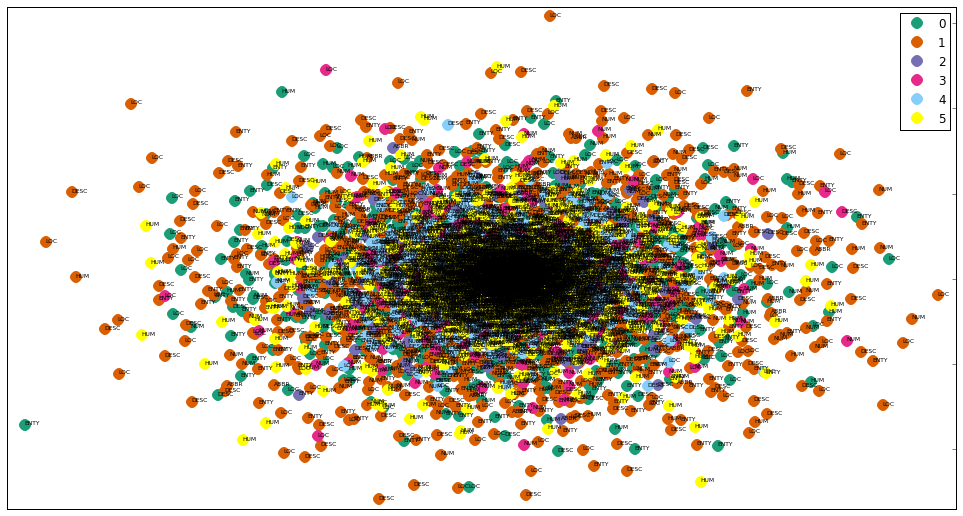

In [15]:
# Graficamos los resultados
matriz_selec = matriz_4
clusters = spectral_4

MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(matriz_selec)
xs, ys = pos[:, 0], pos[:, 1]
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#87cefa', 5: '#ffff00'}
cluster_names = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}
%matplotlib inline 
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=lista_cate1)) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(17, 9)) 
ax.margins(0.02)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both',left='off',  top='off', labelleft='off')
ax.legend(numpoints=1)
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=6)  
plt.show()
plt.savefig('clusters.png', dpi=200)